perform sentiment analysis (Using Naive Bayes Classifier)

In [1]:
# importing the dependencies
import numpy as np
import pickle
import collections
import nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, SklearnClassifier
import csv
from sklearn import cross_validation
from sklearn.svm import LinearSVC, SVC
import random
from nltk.corpus import stopwords
import itertools
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

using unigrams features

In [3]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [4]:
# loading the cleaned training tweets
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [5]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)

In [6]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [7]:
# checking the shape of the output variable
y.shape

(99989,)

In [8]:
# checking the shape of the input matrix -- this is feed into the classifier for training
X.shape

(99989, 41679)

In [9]:
# splitting into training and testing set so as to evaluate our classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [10]:
# fitting the multinomial bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
# training score
clf.score(X_train,y_train)

0.821979972746934

In [74]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.7537753775377538

Confusion matrix, without normalization
[[6272 2510]
 [2414 8802]]
Normalized confusion matrix
[[0.71 0.29]
 [0.22 0.78]]


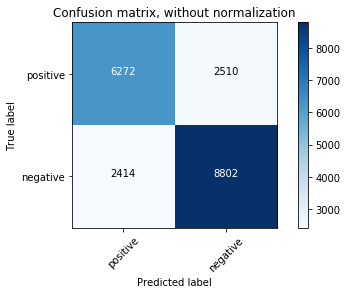

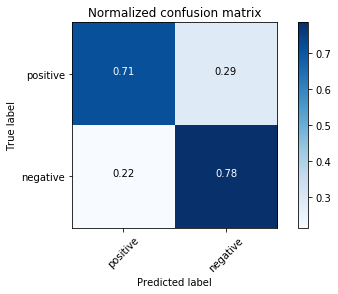

In [75]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [76]:
# finally loading the cleaned test tweets on which we have to do sentiment analysis and report to kaggle
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [77]:
X_test=vectorizer.transform(SentimentText)

In [78]:
# checking the shape
X_test.shape

(299989, 41679)

In [79]:
# predicting the sentiments using trained classifier
predicted = clf.predict(X_test)

In [80]:
# shape of the predicted 
predicted.shape

(299989,)

In [81]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)

using bigrams features

In [82]:
# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [83]:
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [84]:
X=bigram_vectorizer.fit_transform(SentimentText)

In [85]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [86]:
X.shape

(99989, 428766)

In [87]:
y.shape

(99989,)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [89]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:

# training score
clf.score(X_train, y_train)

0.9352552162118238

In [91]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.9336433643364337

Confusion matrix, without normalization
[[ 8111   671]
 [  656 10560]]
Normalized confusion matrix
[[0.92 0.08]
 [0.06 0.94]]


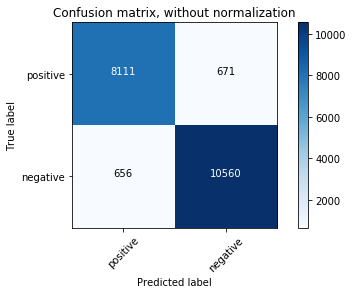

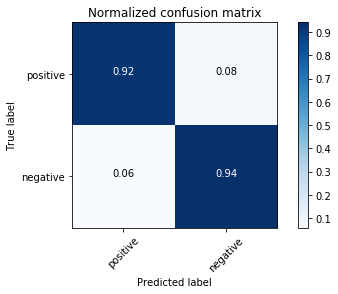

In [92]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [93]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [94]:
X_test=bigram_vectorizer.transform(SentimentText)

In [95]:
X_test.shape

(299989, 428766)

In [96]:
predicted = clf.predict(X_test)

In [97]:
predicted.shape

(299989,)

In [98]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)

using both unigrams and bigrams as features set

In [99]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [100]:
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [101]:
X_unigrams = vectorizer.fit_transform(SentimentText)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText)


In [102]:
X_unigrams.shape

(99989, 41679)

In [103]:
X_bigrams.shape

(99989, 428766)

In [104]:
from scipy.sparse import hstack 
X_combined = hstack([X_unigrams , X_bigrams])

In [105]:
X_combined.shape

(99989, 470445)

In [106]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,train_size = .8 , test_size = .2 , random_state = 0)

In [108]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [109]:
# training score
clf.score(X_train,y_train)

0.9195159455438737

In [110]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.7695269526952695

Confusion matrix, without normalization
[[6639 2143]
 [2466 8750]]
Normalized confusion matrix
[[0.76 0.24]
 [0.22 0.78]]


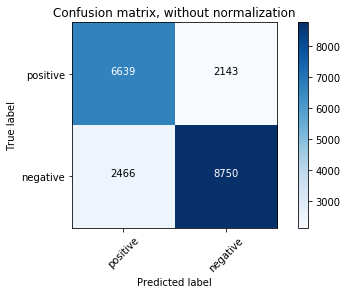

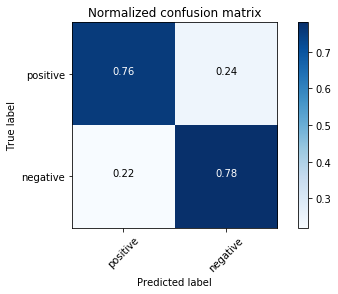

In [111]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [112]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [113]:
X_test_unigrams = vectorizer.transform(SentimentText)
X_test_bigrams = bigram_vectorizer.transform(SentimentText)

In [114]:
X_test_unigrams.shape

(299989, 41679)

In [115]:
X_test_bigrams.shape

(299989, 428766)

In [116]:
from scipy.sparse import hstack 
X_test_combined = hstack([X_test_unigrams , X_test_bigrams])

In [117]:
X_test_combined.shape

(299989, 470445)

In [118]:
predicted = clf.predict(X_test_combined)

In [119]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)

using unigrams bigrams and trigrams 

In [12]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

# finding the trigram representation
trigram_vectorizer =CountVectorizer(ngram_range=(1,3))

In [13]:
X_unigrams = vectorizer.fit_transform(SentimentText)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText)
X_trigrams = trigram_vectorizer.fit_transform(SentimentText)

In [14]:
X_unigrams.shape

(99989, 41679)

In [16]:
X_bigrams.shape

(99989, 428766)

In [17]:
X_trigrams.shape

(99989, 1178466)

In [18]:
from scipy.sparse import hstack 
X_combined = hstack([X_unigrams , X_bigrams, X_trigrams])

In [19]:
X_combined.shape

(99989, 1648911)

In [20]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,train_size = .8 , test_size = .2 , random_state = 0)

In [22]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
# training score
clf.score(X_train,y_train)

0.9607955895038192

In [24]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.7697769776977698

Confusion matrix, without normalization
[[6652 2130]
 [2474 8742]]
Normalized confusion matrix
[[0.76 0.24]
 [0.22 0.78]]


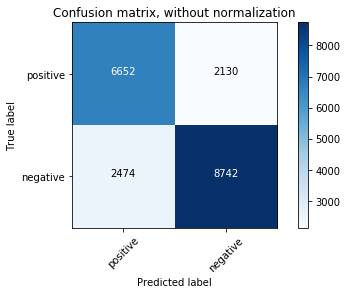

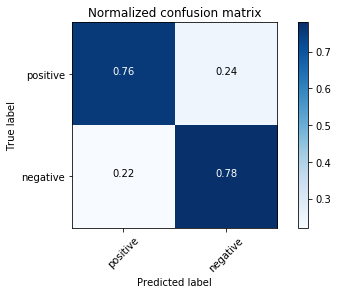

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [27]:
X_test_unigrams = vectorizer.transform(SentimentText)
X_test_bigrams = bigram_vectorizer.transform(SentimentText)
X_test_trigrams = trigram_vectorizer.transform(SentimentText)

In [32]:
from scipy.sparse import hstack 
X_test_combined = hstack([X_test_unigrams , X_test_bigrams,X_test_trigrams])

In [33]:
X_test_combined.shape

(299989, 1648911)

In [34]:
predicted = clf.predict(X_test_combined)

In [35]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)